In [1]:
import numpy as np
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt

## Write a Python Function that builds and trains the model and outputs the final predictions

In [39]:
def ann_function(x, y):
    # Create Model
    ANNreg = nn.Sequential(
        nn.Linear(1,1),
        nn.ReLU(),
        nn.Linear(1,1)
    )
    # Parameters
    learning_rate = .05
    loss_function = nn.MSELoss()
    optimizer = torch.optim.SGD(ANNreg.parameters(), lr=learning_rate)

    # Train Model
    num_epochs = 100
    losses = torch.zeros(num_epochs)

    for epoch_i in range(num_epochs):
        y_pred = ANNreg(x)

        loss = loss_function(y_pred, y)
        losses[epoch_i] = loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Visualization
    plt.plot(x, y, 'bo', label='Real Data')
    plt.plot(x, y_pred.detach(), 'rs', label='Predictions')
    plt.title(f'predictions-data r={np.corrcoef(y.T, y_pred.detach().T)[0,1]:.2f}')
    plt.legend()
    plt.show()
        

    # Return values
    return y_pred, losses
                           

## Write a function that creates the data and outputs x, y. X is the same as in the previous video. y = m*x+randn/2. N=50

In [21]:
def create_data():
    N = 50
    x = torch.randn(N, 1)
    y = x+torch.randn(N,1)/2
    
    return x, y

Text(0, 0.5, 'Y')

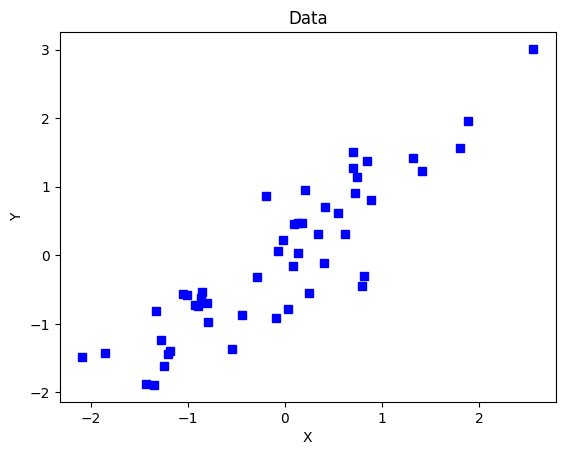

In [31]:
x, y = create_data()

plt.plot(x, y, 'bs')
plt.title('Data')
plt.xlabel('X')
plt.ylabel('Y')

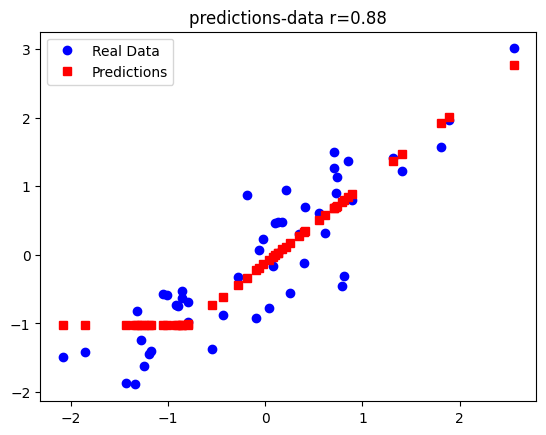

tensor([[ 0.3354],
        [ 0.7183],
        [-1.0224],
        [ 0.7778],
        [ 0.5815],
        [-1.0224],
        [ 0.6794],
        [ 0.0809],
        [ 0.8870],
        [-0.1937],
        [ 0.3484],
        [ 0.6991],
        [-1.0224],
        [-1.0224],
        [-0.7314],
        [-1.0224],
        [ 2.0116],
        [-1.0224],
        [ 0.0319],
        [ 0.6789],
        [-0.3325],
        [-1.0192],
        [-1.0224],
        [ 0.8001],
        [-1.0224],
        [-0.6126],
        [-1.0121],
        [-1.0224],
        [ 0.0315],
        [-0.1384],
        [-0.0274],
        [-1.0224],
        [ 0.1177],
        [-1.0224],
        [-0.0082],
        [-1.0224],
        [-1.0224],
        [-0.2252],
        [-1.0224],
        [ 0.8398],
        [ 0.1679],
        [-0.0766],
        [-1.0224],
        [ 0.2730],
        [ 1.9213],
        [ 1.4725],
        [ 0.5050],
        [ 1.3708],
        [-0.4363],
        [ 2.7664]], grad_fn=<AddmmBackward0>)
tensor([1.6347, 1.3632,

In [40]:
pred, losses = ann_function(x, y)
print(pred)
print(losses)